### An isothermal PFR
An isothermal plug flow reactor is fed with components A, and C in equimolar amounts, and the following reaction takes palce:
$$ 2A \rightarrow B $$
The rate of formation of B is given as below:
$$ r_B = k C_A^2$$
The equations for all three species are then:

\begin{align}
u\frac{dC_A}{dz} &=-2kC_A^2 \\
u\frac{dC_B}{dz} &=+kC_A^2 \\
u\frac{dC_C}{dz} &=0
\end{align}

\begin{align}
@z=0, C_{A0} &=2 \text{ kmol/s} \\
C_{B0} &=0 \\
C_{C0} &=2 \\
\end{align}

The above of set of IVP is solved using Scipy.odeint

In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**1. Problem data**

In [4]:
# Data
L= 2.4   #reactor length, m
u= 0.5   #linear velocity, m/s
k= 0.3   #m3/kmol.s

**2. Define the rhs of IVP: ode file**

In [5]:
def pfr(u,z):
    Ca=u[0]
    Cb=u[1]
    Cc=u[2]
    rB=k*Ca**2
    du_dz=[
        -2*rB,
        rB,
        0
    ]
    return du_dz

**3. Define the IC and integration range**

In [6]:
# Integration range, time range

z=np.linspace(0,L, 15)

# Initial condition: IC
u0=[2.,0.,2.]


**4. Integrate over reactor length. Call odeint integrator**

In [7]:
u=odeint(pfr,u0,z)

**5. visualization**

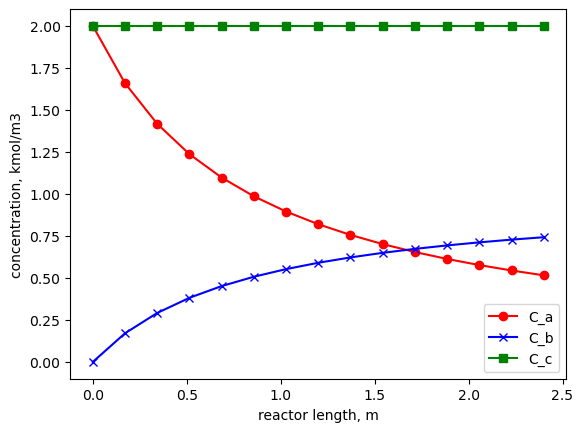

In [8]:
plt.plot(z,u[:,0],'ro-',label='C_a')
plt.plot(z,u[:,1],'bx-',label='C_b')
plt.plot(z,u[:,2],'gs-',label='C_c')
plt.xlabel('reactor length, m')
plt.ylabel('concentration, kmol/m3')
plt.legend(loc='best')